In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("17-googleplaystore.csv")
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [3]:
#df i tanıyalım 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()
# Rating          9367 non-null
#geri kalan verilerim neredeyse eksiksiz 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape # (10841, 13) (row, columbn)

(10841, 13)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df["Reviews"].value_counts()
#Reviews int64 tipli ama string kaydedilmiş bu column  u inte typcast edelim

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [9]:
df["Reviews"].str.isnumeric().sum()
#Reviews         10841 non-null  object  bbir tane non numeric var AJKSBJASBCJKBA


np.int64(10840)

In [10]:
df[~df["Reviews"].str.isnumeric()]
# ~ değili gibi düşün yani bize str olanı verdi 3.0M
#bunu çıkaralım 
#ama orjinal df i bozma 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# 1. Önce orjinal verinin yedeğini (kopyasını) al.
# .copy() demezsen, df_clean üzerinde yaptığın değişiklik orjinal df'i de bozar! (Memory Reference)
df_clean = df.copy()

# 2. Hatalı satırı (10472) sil
# axis=0 (satır silmek için), inplace=True (kalıcı olsun diye)
df_clean.drop(10472, axis=0, inplace=True)

# 3. Artık tertemiz! Gönül rahatlığıyla sayıya (integer) çevir
df_clean["Reviews"] = df_clean["Reviews"].astype(int)

# Kontrol edelim
print(df_clean.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [12]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [14]:
df_clean["Size"].unique()
#buradaki M ve k ler bize sorun yaratacak bunlara str.replace yapalım

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df_clean['Size']= df_clean['Size'].str.replace("M","000")
df_clean['Size']= df_clean['Size'].str.replace("k","")

In [16]:
df_clean['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [17]:
df_clean["Size"]= df_clean["Size"].replace('Varies with device',np.nan)

In [18]:
df_clean["Size"].isnull().sum()
df_clean["Size"] = df_clean["Size"].astype(float)

In [19]:
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs","Price"]

In [20]:
df["Price"].unique()
#buradan dolar sign silinecek 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [21]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [22]:
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]

for item in chars_to_remove:
    for col in cols_to_clean:
        # We replace the symbol with nothing ("")
        df_clean[col] = df_clean[col].str.replace(item, "", regex=False)

In [23]:
df_clean["Installs"].unique()
df_clean["Installs"]= df_clean["Installs"].replace()

/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_5708/71301527.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_clean["Installs"]= df_clean["Installs"].replace()


In [24]:
df_clean["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_clean.describe()

,Rating,Reviews,Size
count,9366.000000,1.084000e+04,9145.000000
mean,4.191757,4.441529e+05,19579.419913
std,0.515219,2.927761e+06,24042.062020
min,1.000000,0.000000e+00,1.000000
25%,4.000000,3.800000e+01,5.600000
50%,4.300000,2.094000e+03,13000.000000
75%,4.500000,5.477550e+04,30000.000000
max,5.000000,7.815831e+07,100000.000000


In [26]:
df_clean["Price"]= df_clean["Price"].astype(float)

In [27]:
df_clean["Installs"]= df_clean["Installs"].astype(int)

In [28]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [29]:
df_clean['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [30]:
df_clean['Last Updated']= pd.to_datetime(df_clean['Last Updated'])
df_clean
df_clean['Day'] = df_clean['Last Updated'].dt.day
df_clean['Month'] = df_clean['Last Updated'].dt.month
df_clean['Year'] = df_clean['Last Updated'].dt.year


In [31]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256,15.609041,6.422325,2017.399723
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017-09-20 00:00:00,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018-05-24 00:00:00,16.000000,7.000000,2018.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,2018-07-20 00:00:00,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,31.000000,12.000000,2018.000000
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703,NaN,9.561621,2.578388,1.100914


<Axes: xlabel='Year', ylabel='Count'>

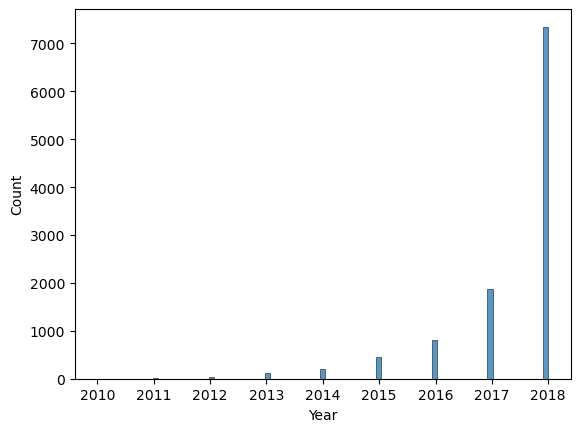

In [32]:
sns.histplot(data=df_clean['Year'] )

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [34]:
df_clean.duplicated("App").sum()

np.int64(1181)

In [35]:
df_clean = df_clean.drop_duplicates(subset=['App'], keep='first')

In [36]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']
#easiest way
# Select only number columns
numeric_df = df_clean.select_dtypes(include=['number'])

# Select only text columns
category_df = df_clean.select_dtypes(include=['object'])

In [37]:
numeric_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Day',
 'Month',
 'Year']

In [38]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

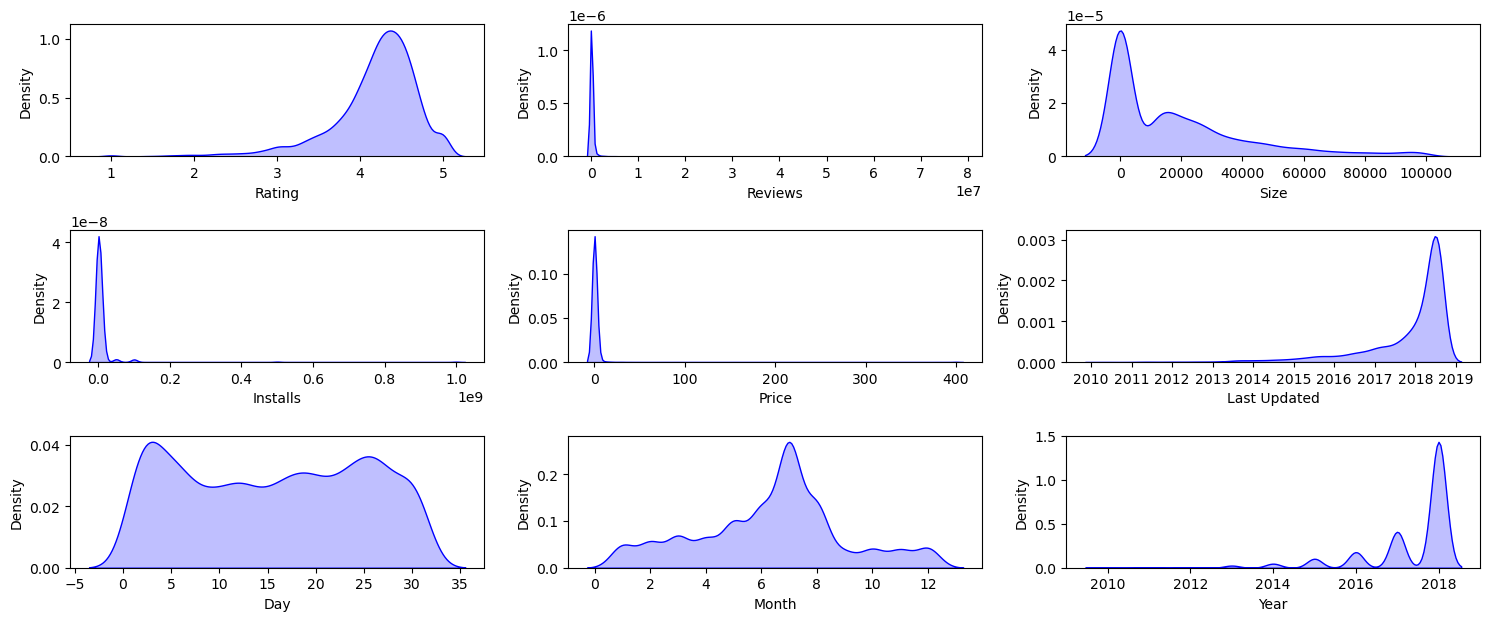

In [39]:
plt.figure(figsize= (15,10))

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_clean[numeric_features[i]], color="b",fill =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show() 

/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_5708/3998739526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean[category[i]], palette="viridis") # palette renk verir
/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_5708/3998739526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean[category[i]], palette="viridis") # palette renk verir


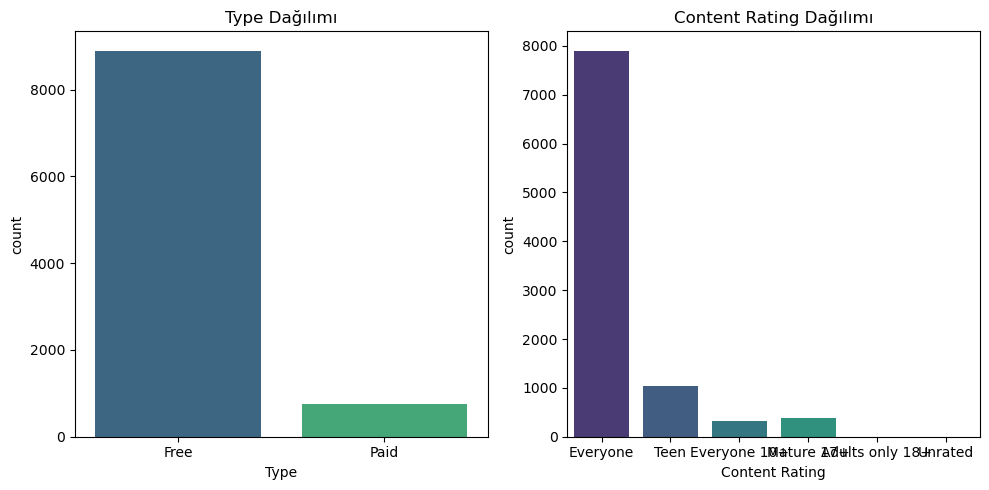

In [40]:
plt.figure(figsize=(10, 5))
category = ["Type", "Content Rating"]

for i in range(0, len(category)):
    plt.subplot(1, 2, i + 1)
    # kdeplot yerine countplot kullanıyoruz
    sns.countplot(x=df_clean[category[i]], palette="viridis") # palette renk verir
    plt.xlabel(category[i])
    plt.title(f"{category[i]} Dağılımı") # Başlık eklemek iyi olur
    plt.tight_layout()

plt.show()

TypeError: object of type 'ellipsis' has no len()

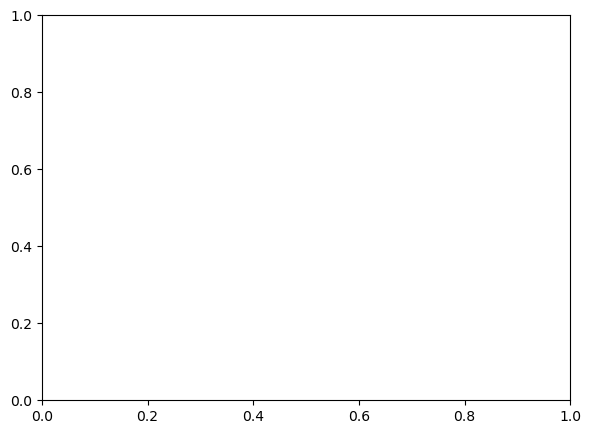

In [41]:
# ADIM 1: Önce 15x5 boyutunda BOŞ bir çerçeve oluşturuyoruz.
# Henüz içinde hiçbir grafik yok, sadece beyaz bir alan var.
plt.figure(figsize=(15, 5)) 

category = ["Type", "Content Rating"]

for i in range(len(category)):
    # ADIM 2: Şimdi bu boş alanı ızgaralara bölüyoruz.
    # subplot(1, 2, i+1) şu demek:
    # "Bu tuvali 1 satır ve 2 sütuna böl. Şimdi (i+1). kutuyu aktif et."
    plt.subplot(1, 2, i + 1)
    
    # ADIM 3: Aktif olan o kutucuğun içine çizimi yap.
    sns.countplot(...)

In [ ]:
# 1. Your logic (Correct)
# We divide by 1,000,000,000 to see "Billions" of installs
df_intalls_category = df_clean.groupby("Category")["Installs"].sum().sort_values(ascending=False)
df2 = (df_intalls_category / 1000000000).head(10)

# 2. THE FIX: Convert Series back to DataFrame!!!!!!!!!!!!
df2 = df2.reset_index() 
# Now 'Category' is a real column again!

# 3. Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x="Installs", y="Category", data=df2)

plt.xlabel("Total Installs (in Billions)") # Good practice to label axes
plt.title("Top 10 Categories by Installs")
plt.show()

In [ ]:
#top5 gategory

apps = ['GAME','COMMUNICATION','TOOLS','PRODUCTIVITY','SOCIAL'

In [ ]:
df_app_category=df_clean.groupby(['Category','App'])['Installs'].sum().reset_index()

In [ ]:
df_app_category=df_app_category.sort_values("Installs",ascending=False)

In [ ]:
apps = ['GAME','COMMUNICATION','TOOLS','PRODUCTIVITY','SOCIAL']


In [ ]:

 plt.figure(figsize=(20,20))
for i,app in enumerate(apps):
    df3=df_app_category[df_app_category.Category==app]
    df3=df3.head(5)

    plt.subplot(3,2,i+1)
    sns.barplot(data=df3,x="Installs",y="App")
    plt.title(app,size=13)
plt.tight_layout()   
plt.show()

In [ ]:
# Imagine 'apps' is a list of your categories
apps = ['GAME', 'FINANCE', 'SOCIAL']

print("--- How enumerate works ---")

# 'i' gets the Index (0, 1, 2)
# 'app' gets the Value ('GAME', 'FINANCE'...)
for i, app in enumerate(apps):
    print(f"Index (i): {i}  |  Category (app): {app}")

In [ ]:
df_rating=df_clean.groupby(['Category','App',"Installs"])['Rating'].sum().sort_values(ascending=False).reset_index()
df_rating
df_five_star= df_rating[df_rating.Rating==5]
df_five_star

In [ ]:
plt.figure(figsize=(6,25))
sns.boxplot(data=df_five_star,x="Rating",y="Installs")


In [ ]:
df_clean['Current Ver']=df_clean["Current Ver"].replace("Varies with device","",regex=True)

In [ ]:
df_clean['Current Ver']=df_clean["Current Ver"].replace("Varies with device","",regex=True)

In [ ]:
df_clean["Android Ver"].unique()


In [42]:
df_clean['Android Ver'].str.contains("and up").sum()
df_clean['Android Ver']=df_clean['Android Ver'].replace("and up","",regex=True)
df_clean['Android Ver']=df_clean['Android Ver'].replace('Varies with device',"",regex=True)
df_clean['Android Ver']=df_clean['Android Ver'].replace('',np.nan,regex=True)
df_clean['Android Ver']=df_clean['Android Ver'].replace('W',"",regex=True)
df_clean = df_clean[df_clean['Android Ver'].str.contains("-")==False]

In [43]:
df_clean['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '2.0.1 ', '1.0 '],
      dtype=object)

In [50]:
df_clean["Genres"].value_counts()

Genres
Tools                              735
Entertainment                      518
Education                          473
Business                           387
Medical                            373
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: count, Length: 117, dtype: int64

## Target Encoding


In [57]:
import pandas as pd

# 1. Create dummy data
data = {
    'Car_Brand': ['BMW', 'BMW', 'Audi', 'Audi', 'Fiat', 'Fiat'],
    'Price': [50000, 52000, 45000, 47000, 15000, 16000] 
}
df = pd.DataFrame(data)

print("--- Original Data ---")
print(df)

# 2. Calculate the Mean (Average) Price for each Brand
# We group by the Category ('Car_Brand') and take the mean of the Target ('Price')
brand_means = df.groupby('Car_Brand')['Price'].mean()

print("\n--- The Map (Average Prices) ---")
print(brand_means)

# 3. Map these numbers back to the original column
df['Brand_Encoded'] = df['Car_Brand'].map(brand_means)

print("\n--- Final Data for Machine Learning ---")
print(df)

--- Original Data ---
  Car_Brand  Price
0       BMW  50000
1       BMW  52000
2      Audi  45000
3      Audi  47000
4      Fiat  15000
5      Fiat  16000

--- The Map (Average Prices) ---
Car_Brand
Audi    46000.0
BMW     51000.0
Fiat    15500.0
Name: Price, dtype: float64

--- Final Data for Machine Learning ---
  Car_Brand  Price  Brand_Encoded
0       BMW  50000        51000.0
1       BMW  52000        51000.0
2      Audi  45000        46000.0
3      Audi  47000        46000.0
4      Fiat  15000        15500.0
5      Fiat  16000        15500.0


In [56]:
# !pip install category_encoders
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['Car_Brand'])
df['Brand_Encoded_Safe'] = encoder.fit_transform(df['Car_Brand'], df['Price'])

In [58]:
df

,Car_Brand,Price,Brand_Encoded
0,BMW,50000,51000.0
1,BMW,52000,51000.0
2,Audi,45000,46000.0
3,Audi,47000,46000.0
4,Fiat,15000,15500.0
5,Fiat,16000,15500.0


0    39414.989376
1    39414.989376
2    38705.734052
3    38705.734052
4    34379.276572
5    34379.276572
Name: Brand_Encoded_Safe, dtype: float64